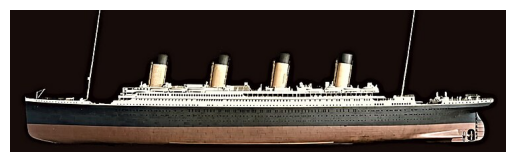

In [ ]:
# @title
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("Titanic_Portside_Diagram.jpg")
plt.imshow(img)
plt.axis('off')  # Quitar los ejes
plt.show()


# **Antecedentes:**
 El Titanic fue un transatlántico y considerado uno de los barcos más grandes y lujosos de su época. Pertenecía a la clase Olympic, operada por la compañía White Star Line. Fue diseñado para ser el buque más seguro y rápido de su tiempo, equipado con tecnología avanzada y compartimentos estancos que, en teoría, lo hacían "insumergible". Sin embargo, el 10 de abril de 1912, zarpó en su viaje inaugural desde Southampton, Inglaterra, con destino a Nueva York. Trágicamente, el 14 de abril de 1912, el Titanic chocó con un iceberg en el Atlántico Norte y se hundió en las primeras horas del 15 de abril, causando la muerte de más de 1,500 personas, lo que lo convirtió en uno de los desastres marítimos más devastadores de la historia.

Este evento no solo impactó profundamente en la navegación marítima, sino que también impulsó nuevas normas de seguridad y cambios en la regulación internacional para evitar tragedias similares en el futuro.

# A continuación, se exploran los datos acerca  de los pasajeros del titanic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('titanic.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S


In [ ]:
df.shape

(891, 12)

In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# El archivo contiene los datos de 891 pasajeros a bordo del Titanic. Es importante mencionar que faltan algunos datos de varios pasajeros, como la edad y el número de cabina

En la nave viajaron 314 mujeres y 577 hombres. La Figura 1 muestra la proporción de personas por género.



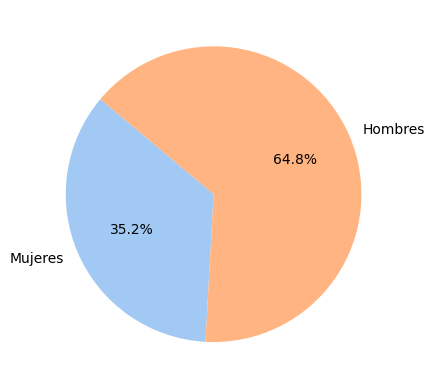

In [ ]:
# @title
df.groupby('Sex').count()
plt.pie([314, 577], labels=['Mujeres', 'Hombres'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Mostrar el gráfico
plt.show()


# La edad de la mayoría de los pasajeros estaba entre los 20 y 30 años; sin embargo, también viajaban niños y adultos mayores, aunque eran minoría.

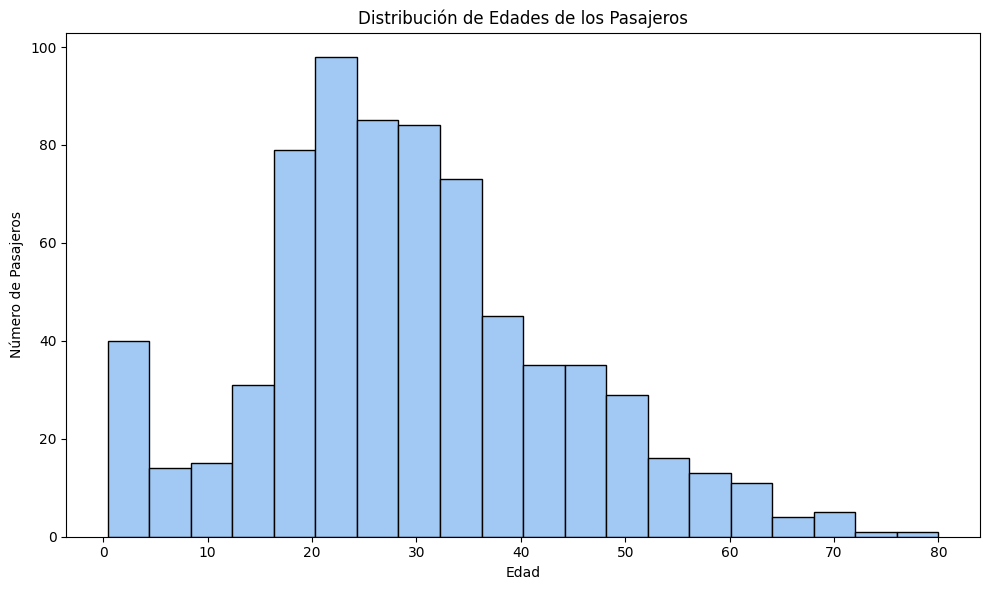

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma de la edad
plt.hist(df['Age'], color=sns.color_palette('pastel')[0], bins=20, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.title('Distribución de Edades de los Pasajeros')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La distribución de edad se muestra en la Figura 3, y se observa que la mayoría de las mujeres eran jóvenes, con edades entre 15 y menos de 40 años. La mayoría de los hombres estaba entre los 18 y los 40 años aproximadamente.

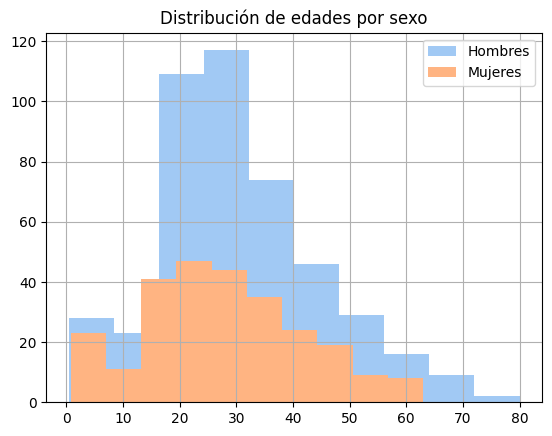

In [ ]:
# @title
df.groupby('Sex').get_group('male')['Age'].hist(color=sns.color_palette('pastel')[0])
df.groupby('Sex').get_group('female')['Age'].hist(color=sns.color_palette('pastel')[1])
plt.legend(['Hombres', 'Mujeres'])
plt.title('Distribución de edades por sexo')
plt.show()

De acuerdo con la Figura 4, el puerto donde más personas abordaron el barco fue el puerto de Southampton, con más de 600 pasajeros. También es posible deducir que este fue el puerto desde el cual zarpó en un inicio.

Se puede observar en la Figura 4 los tres puertos en los cuales los pasajeros del Titanic embarcaron. Southampton fue el puerto en el que más pasajeros subieron al barco, con un total de 664. En Cherbourg abordaron 168 personas y en Queenstown, solamente 77

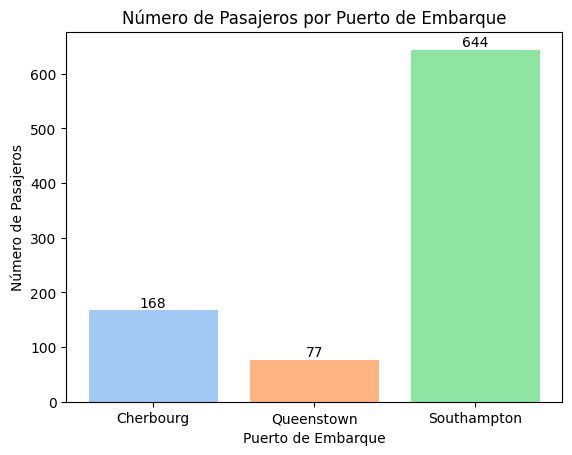

In [ ]:
# Contar el número de pasajeros por puerto de embarque
puerto = df.groupby('Embarked')['PassengerId'].count().index
frec = df.groupby('Embarked')['PassengerId'].count().values

# Crear el gráfico de barras
bars = plt.bar(['Cherbourg', 'Queenstown', 'Southampton'], frec, color=sns.color_palette('pastel'))

# Añadir el número de pasajeros encima de cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de cada barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Añadir texto

# Etiquetas y título
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Pasajeros por Puerto de Embarque')

# Mostrar el gráfico
plt.show()

La figura 5 deja ver que la distribucion de clases es muy parecida para hombres y mujeres

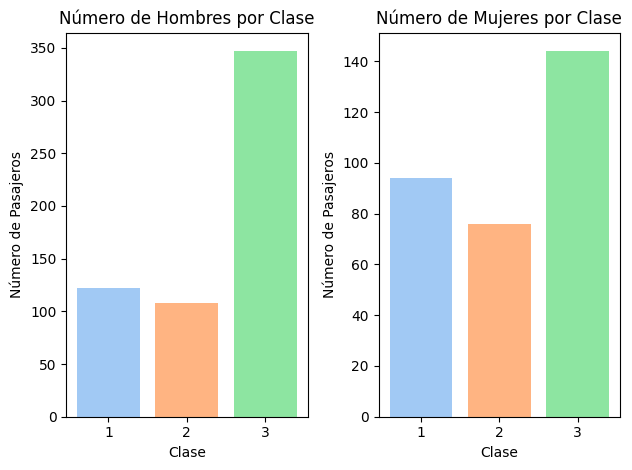

In [ ]:

plt.subplot(1, 2, 1)
df.groupby('Pclass').get_group(1)['PassengerId'].count()
df.groupby('Pclass').get_group(2)['PassengerId'].count()
df.groupby('Pclass').get_group(3)['PassengerId'].count()
male_counts = df[df['Sex'] == 'male']['Pclass'].value_counts().sort_index()
plt.bar(male_counts.index, male_counts.values, color=sns.color_palette('pastel'))
plt.xlabel('Clase')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Hombres por Clase')


plt.subplot(1, 2, 2)
female_counts = df[df['Sex'] == 'female']['Pclass'].value_counts().sort_index()
plt.bar(female_counts.index, female_counts.values, color=sns.color_palette('pastel'))
plt.xlabel('Clase')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Mujeres por Clase')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

En la imagen 6 se percibe mejor la distribución de los pasajeros del barco, tanto por sexo como por clase, siendo la población más grande la tercera clase, con un 55.1% de personas (38.9% hombres y 16.2% mujeres). De ahí le sigue la segunda clase, con un 20.6% (12.1% hombres y 8.5% mujeres), y finalmente la primera clase, ocupando un 24.2% en total, sumando hombres un 13.7% y mujeres un 10.5%.



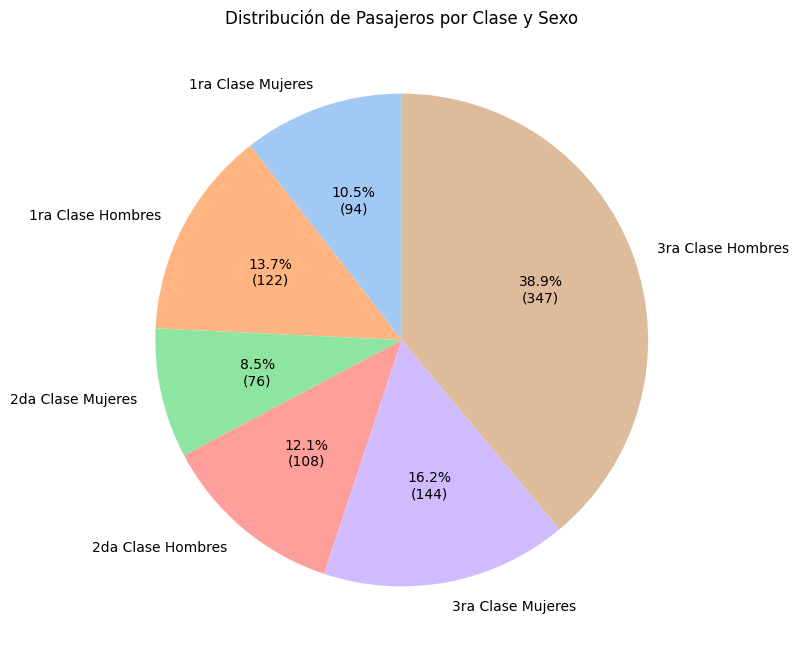

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por Clase y Sexo, y contar cuántos pasajeros hay en cada combinación
grouped_data = df.groupby(['Pclass', 'Sex'])['PassengerId'].count()

# Definir las etiquetas para las secciones del pastel
labels = ['1ra Clase Mujeres', '1ra Clase Hombres',
          '2da Clase Mujeres', '2da Clase Hombres',
          '3ra Clase Mujeres', '3ra Clase Hombres']

# Colores personalizados para cada categoría
colors = sns.color_palette('pastel', 6)

# Función para mostrar tanto el porcentaje como el número en cada sección
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=labels, colors=colors, autopct=autopct_format(grouped_data), startangle=90)

# Añadir el título
plt.title('Distribución de Pasajeros por Clase y Sexo')

# Mostrar la gráfica
plt.show()

La siguiente gráfica (Imagen 7) muestra la distribución del estatus de acompañamiento de los pasajeros según su sexo. Se observa que la población más grande corresponde a los hombres que viajaban solos, representando el 46.1% del total. En segundo lugar, se encuentran las mujeres acompañadas, con un 21.1%. En tercer lugar, están los hombres acompañados, que representan el 18.6%, y finalmente, las mujeres que viajaban solas, con un 14.1%.

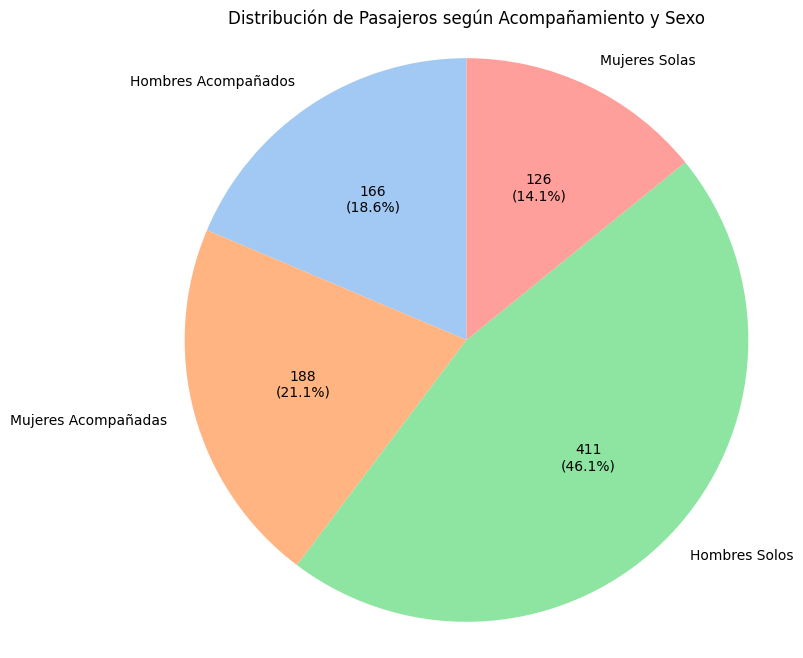

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Importar NumPy



# Crear una nueva columna para identificar si viajaban acompañados o solos
df['Accompanied'] = df['SibSp'] + df['Parch'] > 0

# Agrupar los datos por sexo y estado de acompañamiento
grouped_data = df.groupby(['Accompanied', 'Sex']).size()

# Definir las etiquetas para las secciones del pastel
labels = ['Hombres Acompañados', 'Mujeres Acompañadas',
          'Hombres Solos', 'Mujeres Solas']

# Calcular los valores para cada categoría
values = [
    grouped_data.get((True, 'male'), 0),    # Hombres Acompañados
    grouped_data.get((True, 'female'), 0),  # Mujeres Acompañadas
    grouped_data.get((False, 'male'), 0),   # Hombres Solos
    grouped_data.get((False, 'female'), 0)   # Mujeres Solas
]

# Colores personalizados para cada categoría
colors = sns.color_palette('pastel', 4)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))

# Función personalizada para mostrar el número y el porcentaje
def func(pct, allvalues):
    absolute = int(np.round(pct / 100. * sum(allvalues)))
    return f"{absolute}\n({pct:.1f}%)"

# Crear el gráfico de pastel
plt.pie(values, labels=labels, colors=colors, autopct=lambda pct: func(pct, values), startangle=90)

# Añadir el título
plt.title('Distribución de Pasajeros según Acompañamiento y Sexo')

# Mostrar la gráfica
plt.axis('equal')  # Para asegurar que el pastel sea un círculo
plt.show()



La distribucion del tipo de acompañamiento para cada sexo es tambien muy parecida, con un porcentaje un poco mayor de hombres solos respecto al porcentaje de mujeres solas.

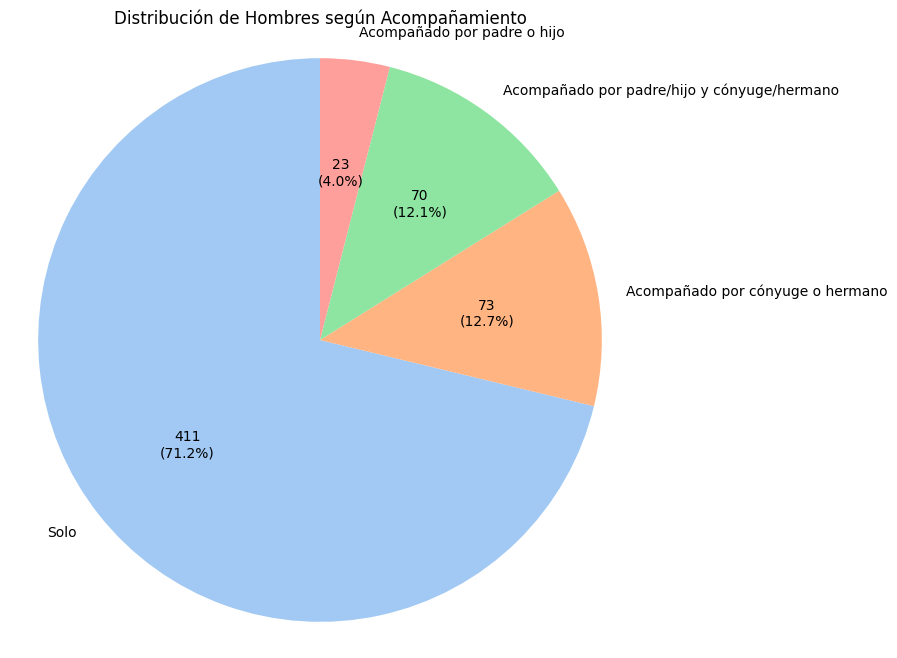

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear una nueva columna para identificar si viajaban acompañados o solos
df['Accompanied'] = df['SibSp'] + df['Parch'] > 0

# Crear una nueva columna para clasificar los hombres según su estado de acompañamiento
def categorize_men(row):
    if row['Sex'] == 'male':
        if row['SibSp'] > 0 or row['Parch'] > 0:  # Acompañado
            if row['SibSp'] > 0 and row['Parch'] > 0:  # Acompañado por ambos
                return 'Acompañado por padre/hijo y cónyuge/hermano'
            elif row['SibSp'] > 0:  # Acompañado por cónyuge o hermano
                return 'Acompañado por cónyuge o hermano'
            else:  # Acompañado por padre o hijo
                return 'Acompañado por padre o hijo'
        else:
            return 'Solo'  # Solo
    return None

# Aplicar la función para categorizar hombres
df['Men_Category'] = df.apply(categorize_men, axis=1)

# Contar los hombres en cada categoría
men_counts = df['Men_Category'].value_counts()

# Definir las etiquetas para las secciones del pastel
labels = men_counts.index

# Colores personalizados para cada categoría
colors = sns.color_palette('pastel', len(labels))

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))

# Función personalizada para mostrar el número y el porcentaje
def func(pct, allvalues):
    absolute = int(np.round(pct / 100. * sum(allvalues)))
    return f"{absolute}\n({pct:.1f}%)"

# Crear el gráfico de pastel
plt.pie(men_counts, labels=labels, colors=colors, autopct=lambda pct: func(pct, men_counts), startangle=90)

# Añadir el título
plt.title('Distribución de Hombres según Acompañamiento')

# Mostrar la gráfica
plt.axis('equal')  # Para asegurar que el pastel sea un círculo
plt.show()



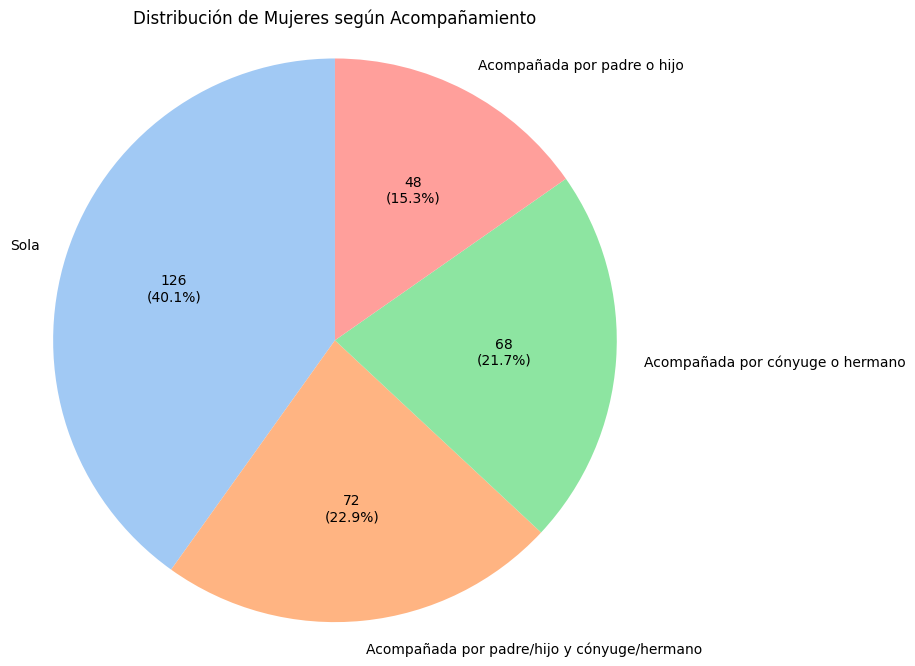

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear una nueva columna para identificar si viajaban acompañados o solos
df['Accompanied'] = df['SibSp'] + df['Parch'] > 0

# Crear una nueva columna para clasificar las mujeres según su estado de acompañamiento
def categorize_women(row):
    if row['Sex'] == 'female':
        if row['SibSp'] > 0 or row['Parch'] > 0:  # Acompañada
            if row['SibSp'] > 0 and row['Parch'] > 0:  # Acompañada por ambos
                return 'Acompañada por padre/hijo y cónyuge/hermano'
            elif row['SibSp'] > 0:  # Acompañada por cónyuge o hermano
                return 'Acompañada por cónyuge o hermano'
            else:  # Acompañada por padre o hijo
                return 'Acompañada por padre o hijo'
        else:
            return 'Sola'  # Sola
    return None

# Aplicar la función para categorizar mujeres
df['Women_Category'] = df.apply(categorize_women, axis=1)

# Contar las mujeres en cada categoría
women_counts = df['Women_Category'].value_counts()

# Definir las etiquetas para las secciones del pastel
labels = women_counts.index

# Colores personalizados para cada categoría
colors = sns.color_palette('pastel', len(labels))

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))

# Función personalizada para mostrar el número y el porcentaje
def func(pct, allvalues):
    absolute = int(np.round(pct / 100. * sum(allvalues)))
    return f"{absolute}\n({pct:.1f}%)"

# Crear el gráfico de pastel
plt.pie(women_counts, labels=labels, colors=colors, autopct=lambda pct: func(pct, women_counts), startangle=90)

# Añadir el título
plt.title('Distribución de Mujeres según Acompañamiento')

# Mostrar la gráfica
plt.axis('equal')  # Para asegurar que el pastel sea un círculo
plt.show()


vfdf

En el Titanic había tres clases o categorías. La más cara fue la clase 1, en la que abordaron 214 personas. La clase 2 fue la de precio intermedio, y en esa categoría hubieron 182 pasajeros. Finalmente, la clase 3 fue la de menor precio, y fue la que tuvo mayor cantidad de personas con 491. La Tabla 1 muestra el puerto de origen y la cantidad de pasajeros por clase.

In [ ]:
import pandas as pd

# Mapeo de abreviaturas de puertos a nombres completos
puerto_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

# Crear una columna con los nombres completos de los puertos
df['Embarked_full'] = df['Embarked'].map(puerto_map)

# Agrupar los datos por puerto de embarque completo y clase
tabla_datos = df.groupby(['Pclass', 'Embarked_full']).size().unstack(fill_value=0)

# Mostrar la tabla como un DataFrame
tabla_datos


Embarked_full,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


Graficamente la distribucion de personas que abordaron el barco por puerto según su clase se da de las siguientes maneras:

Puerto: Cherbourg, Número de pasajeros: 168


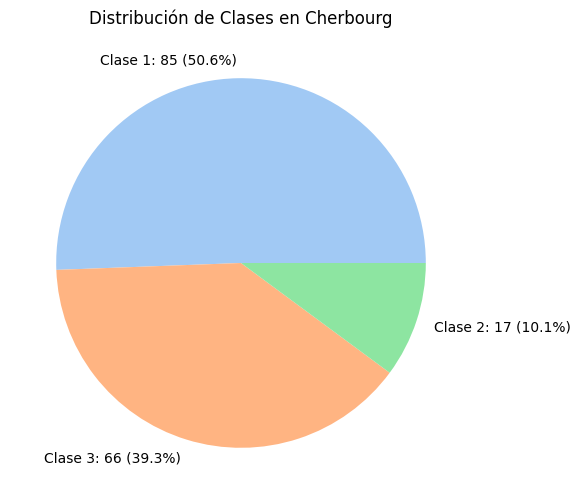

Puerto: Queenstown, Número de pasajeros: 77


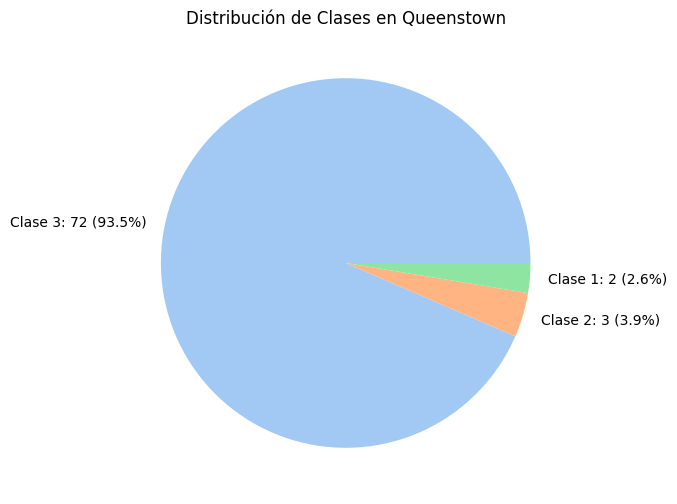

Puerto: Southampton, Número de pasajeros: 644


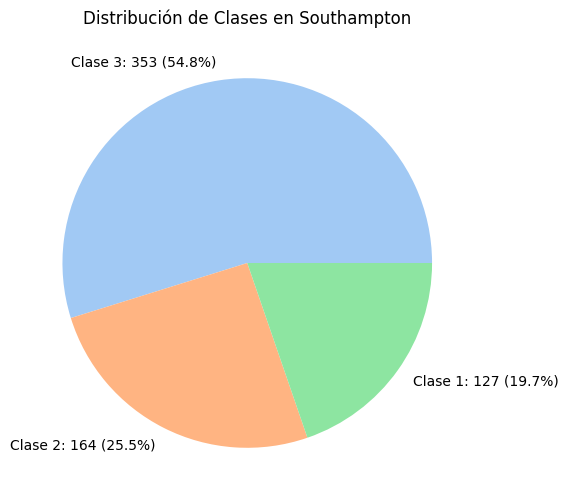

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mapeo de abreviaturas de puertos a nombres completos
puerto_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

# Crear una columna con los nombres completos de los puertos
df['Embarked_full'] = df['Embarked'].map(puerto_map)

# Agrupar los datos por puerto de embarque completo
grupos = df.groupby('Embarked_full').groups

# Iterar sobre cada puerto de embarque y mostrar los gráficos y datos
for puerto, indices in grupos.items():
    print(f'Puerto: {puerto}, Número de pasajeros: {len(indices)}')

    # Filtramos los datos del puerto actual
    df_puerto = df.loc[indices]

    # Agrupamos por clase y contamos cuántos pasajeros hay en cada una
    clases = df_puerto['Pclass'].value_counts()

    # Crear el gráfico de pastel con porcentaje y número de pasajeros
    plt.figure(figsize=(6, 6))  # Tamaño de la gráfica
    plt.pie(clases,
            labels=[f"Clase {int(clase)}: {num_pasajeros} ({num_pasajeros / clases.sum() * 100:.1f}%)" for clase, num_pasajeros in clases.items()],
            autopct=None,  # Las etiquetas personalizadas ya muestran el porcentaje
            colors=sns.color_palette('pastel'))  # Usamos una paleta de colores de seaborn
    plt.title(f'Distribución de Clases en {puerto}')
    plt.show()

